Video Games data set. 
--


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
games=pd.read_csv('datasets/games.csv')
print('The DataFrame has the next columns:\n')
games.info()
#print(games.head())


The DataFrame has the next columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Clean and clear the Data Frame. 
--
Analize duplicated values, missing values, columns names, type of value of each column.
Columns names are with capital letters, lets change them to lower letters to have a better data management. 

In [3]:
new_columns= []
for c in games.columns:
    low_c=c.lower()
    new_columns.append(low_c)
games.columns = new_columns
print(games.columns)
#games.info()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [4]:
print('The DF has ',games.duplicated().sum(), 'duplicated rows.')
print('The DF has the following amount of null in each column:\n',games.isna().sum())

The DF has  0 duplicated rows.
The DF has the following amount of null in each column:
 name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Analyze each column with NaN values to determine if it is possible to remove the rows or replace the value with a different one that fits the values.
Let's start with the name and gender columns, because it looks like their NaN values belong to the same rows.

In [5]:
print("The two rows with NaN value in the column name are:\n",games[games['name'].isna()])
print("The two rows with NaN value in the column genre are:\n",games[games['genre'].isna()])
games.fillna({'name':'NA'},inplace=True)
games.fillna({'genre':'NA'},inplace=True)
print('Now the NaN values in name is:',games['name'].isna().sum())
print('Now the NaN values in genre is:',games['genre'].isna().sum())
#games.info()

The two rows with NaN value in the column name are:
       name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
The two rows with NaN value in the column genre are:
       name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
Now the NaN values in name is: 0
Now the NaN values in genre is: 0


Clearing the release year column of its 250 NaN values. 
Calculate the mean and median to determine the value that will replace the NaN values.

In [6]:
print('Mean -> ',games['year_of_release'].mean())
print('Median->',games['year_of_release'].median())
games.fillna({'year_of_release':2006.0},inplace=True)
print('Now the NaN values in year_of_release is: ',games['year_of_release'].isna().sum())
print('After the change the Mean is-> ',games['year_of_release'].mean())
print('After the change the Median is ->',games['year_of_release'].median())
games['year_of_release']=games['year_of_release'].astype('int')
#games.info()

Mean ->  2006.4846163200777
Median-> 2007.0
Now the NaN values in year_of_release is:  0
After the change the Mean is->  2006.4929105593778
After the change the Median is -> 2007.0


Now let's clean critic_score and user_score columns.
Both columns have more than 6000 NaN values, let's calculate the mean and the median.
Both columns need to have float type of values. 

In [7]:
#critic_score column
print('Mean of critic_score ->',games['critic_score'].mean())
print('Median of critic_score ->',games['critic_score'].median())
games.fillna({'critic_score':71},inplace=True)
print('After the replacement the Mean of critic_score is->',games['critic_score'].mean())
print('After the replacement the Median of critic_score is->',games['critic_score'].median())

#user_score column
#values=games.query("user_score != 'tbd'")
#tbd_values=games.query("user_score == 'tbd'").count()
#nan_values = games['user_score'].isna().sum()
#print('There are nan ->',nan_values)
#print('There are tbd ->',tbd_values['user_score'])
#print(games['user_score'].count())
#values=values['user_score'].astype('float')
#games.replace({'user_score':'tbd'},'7.5',inplace=True)
#print('Mean of user_score ->',values.mean())
#print('Median of user_score ->',values.median())
#games['user_score']=games['user_score'].astype('float')
#games.fillna({'user_score':7.5},inplace=True)
#print('After the replacement the Mean of user_score ->',games['user_score'].mean())
#print('After the replacement the Median of user_score ->',games['user_score'].median())

games['user_score']=pd.to_numeric(games['user_score'],errors='coerce')
print('Mean of user_score ->',games['user_score'].mean())
print('Median of user_score ->',games['user_score'].median())
games.fillna({'user_score':7.5},inplace=True)
print('After the replacement the Mean of user_score ->',games['user_score'].mean())
print('After the replacement the Median of user_score ->',games['user_score'].median())


Mean of critic_score -> 68.96767850559173
Median of critic_score -> 71.0
After the replacement the Mean of critic_score is-> 70.01064911755908
After the replacement the Median of critic_score is-> 71.0
Mean of user_score -> 7.125046113306982
Median of user_score -> 7.5
After the replacement the Mean of user_score -> 7.329739754711337
After the replacement the Median of user_score -> 7.5


In [8]:
games.fillna({'rating':'NA'},inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [9]:
#Totals of sales. 
games['total_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NA,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NA,31.38


SUMMARY OF DATA PREPARATION.

Now the data frame hasn't duplicated values or absent values. 
The names of the columns have an easy format. 


DATA ANALYSIS 
--

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1466
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


<Axes: xlabel='Years'>

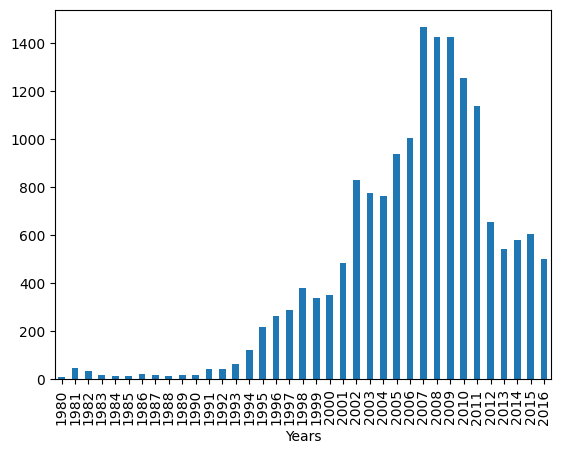

In [10]:
print(games.groupby('year_of_release').count()['name'])
games.groupby('year_of_release')['name'].count().plot(kind='bar',y='name',x='year_of_release',xlabel='Years')

   platform  total_sales
0       PS2      1255.77
1      X360       971.42
2       PS3       939.65
3       Wii       907.51
4        DS       806.12
5        PS       730.86
6       GBA       317.85
7       PS4       314.14
8       PSP       294.05
9        PC       259.52
10      3DS       259.00
11       XB       257.74
12       GB       255.46
13      NES       251.05
14      N64       218.68
15     SNES       200.04
16       GC       198.93
17     XOne       159.32
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' 'PSP' 'XOne' 'GC']


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001DE77D72AC0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

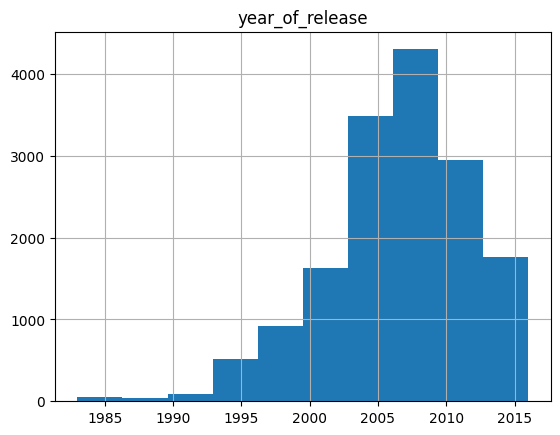

In [77]:
sales_platforms= games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
top=sales_platforms[sales_platforms['total_sales']>100]
print(top)
games_query = games.query("platform in @top.platform")
print(games_query['platform'].unique())
games_query.hist(column='year_of_release')
games_query.plot(x='platform',y='year_of_release',kind='hist')